# 1-D mixture of distributions using scipy.stats

This code example explores a mixture of distributions and generates samples from it.

## Import modules

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

## Define distributions
Here the mixture is composed of two normal, $\mathcal{N}(-3, 2^2), \mathcal{N}(5, 2.5^2)$, and one uniform, $\mathcal{U}[1,3]$ distribution.

In [2]:
distributions = [
    ss.norm(loc = -3, scale = 2),
    ss.uniform(loc = 1, scale = 2),
    ss.norm(loc = 5, scale = 2.5),
]
num_distr = len(distributions)

## Define mixing coefficients
If necessary, the coefficients are scaled to add to one. An exception is raised if the number of coefficients is not equal to the number of distributuions.

In [3]:
coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()
num_coeff = len(coefficients)
if num_coeff != num_distr:
    raise Exception('number of mixing coefficients has to equal number of distributions')

## Plot probability density functions
### First individually

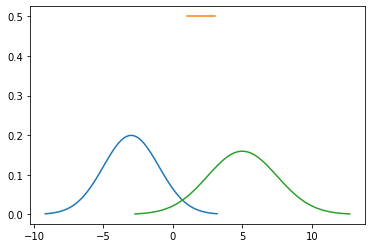

In [4]:
x_all = np.array([])
for idx, distr in enumerate(distributions):
    x = np.linspace(distr.ppf(0.001), distr.ppf(0.999), 100)
    x_all = np.union1d(x_all,x)
    plt.plot(x,distr.pdf(x))
plt.show()

### Then mixed

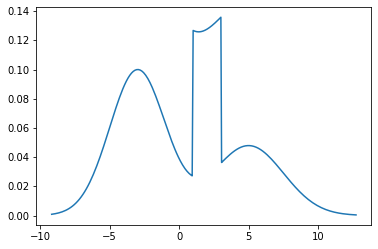

In [5]:
y_all = np.zeros_like(x_all)
for idx, distr in enumerate(distributions):
    y_all += distr.pdf(x_all) * coefficients[idx]
plt.plot(x_all,y_all)
plt.show()

## Generate samples

### Define sample size

In [6]:
sample_size = 10000

### Allocate storage space

In [7]:
data = np.zeros((sample_size, num_distr))

### Sample the distribution which generates each sample

In [8]:
mixing_idx = np.random.choice(len(coefficients), size=(sample_size,), replace=True, p=coefficients)

### Generate enough samples from each distribution 

In [9]:
for idx, distr in enumerate(distributions):
    data[:, idx] = distr.rvs(size=sample_size)

### Choose the samples generated by the specified distributions

In [10]:
sample = data[np.arange(sample_size), mixing_idx]

### Plot histogram of samples

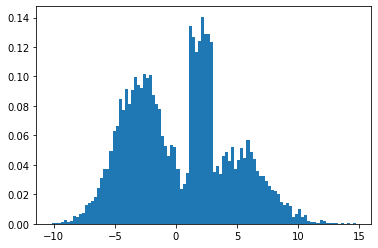

In [11]:
plt.hist(sample, bins=100, density=True)
plt.show()